In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[1, -1, 1], [-1, 1, -1], [-1, 1, -1], [1, -1, 1]])
Y = np.array([[1, -1, 1], [-1, 1, -1], [-1, 1, -1], [-1, 1, -1]])
A = np.array([[-1, 1, -1], [1, -1, 1], [1, 1, 1], [1, -1, 1]])
C = np.array([[-1, 1, 1], [1, -1, -1], [1, -1, -1], [-1, 1, 1]])


In [ ]:
X.shape

(4, 3)

In [ ]:
img_name = ['X', 'Y', 'A', 'C']
img = [X, Y, A, C]
m = 4

In [ ]:
X_flat = X.reshape(12)
Y_flat = Y.reshape(12)
A_flat = A.reshape(12)
C_flat = C.reshape(12)

In [ ]:
w = np.array([X_flat/2, Y_flat/2, A_flat/2, C_flat/2]).T
print(w)

[[ 0.5  0.5 -0.5 -0.5]
 [-0.5 -0.5  0.5  0.5]
 [ 0.5  0.5 -0.5  0.5]
 [-0.5 -0.5  0.5  0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [-0.5 -0.5  0.5 -0.5]
 [-0.5 -0.5  0.5  0.5]
 [ 0.5  0.5  0.5 -0.5]
 [-0.5 -0.5  0.5 -0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [-0.5  0.5 -0.5  0.5]
 [ 0.5 -0.5  0.5  0.5]]


In [ ]:
X_flat.shape

(12,)

In [ ]:
n = w.shape[0]
bias = n/2

In [ ]:
def activation(a):
  out = np.where(a >= 0, a, 0)
  return out

In [ ]:
def maxnet(input):
  weight = (-1*0.15*np.ones([m, m])) + ((0.15+1) * np.identity(m))
  a_new = input.copy()
  stop = len(input)
  updates = []
  while (stop > 1):
    a_new = activation(np.dot(a_new, weight))
    updates.append(a_new)
    stop = sum(1 for i in a_new if i != 0)
  return updates[len(updates) - 1].argmax(axis = 0)

In [ ]:
def HammingDist(exe, input):
  m = len(exe)
  weight = []
  for i in range(m):
    weight.append(exe[i]/2)
  weight = np.array(weight).T
  y = np.zeros([m])
  y = bias + np.dot(input, weight)
  return y

In [ ]:
def HammingNet(exe, input):
  dist = HammingDist(exe, input)
  idx = maxnet(dist)
  return idx

#Part 1

In [ ]:
XYHamming = HammingDist(Y_flat, X_flat)
print(f'Hamming Distance between X&Y is : {XYHamming}')
XAHamming = HammingDist(A_flat, X_flat)
print(f'Hamming Distance between X&A is : {XAHamming}')
XCHamming = HammingDist(C_flat, X_flat)
print(f'Hamming Distance between X&C is : {XCHamming}')
YAHamming = HammingDist(A_flat, Y_flat)
print(f'Hamming Distance between Y&A is : {YAHamming}')
YCHamming = HammingDist(C_flat, Y_flat)
print(f'Hamming Distance between Y&C is : {YCHamming}')
ACHamming = HammingDist(C_flat, A_flat)
print(f'Hamming Distance between A&C is : {ACHamming}')


()
Hamming Distance between X&Y is : 9.0
()
Hamming Distance between X&A is : 4.0
()
Hamming Distance between X&C is : 4.0
()
Hamming Distance between Y&A is : 1.0
()
Hamming Distance between Y&C is : 5.0
()
Hamming Distance between A&C is : 6.0


#Part 2

In [ ]:
input = np.array([[1, 1, 1], [-1, 1, -1], [-1, 1, -1], [-1, 1, -1]])
exemplas = [X_flat, Y_flat, A_flat, C_flat]

(12, 4)
The most similar img is : Y



Text(0.5, 1.0, 'Nearest Image')

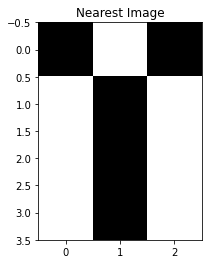

In [ ]:
idx = HammingNet(exemplas, input.reshape(12))
print(f'The most similar img is : {img_name[idx]}')
print()
plt.imshow(img[idx], cmap = 'Greys')
plt.title('Nearest Image')

In [ ]:
TYHamming = HammingDist(Y_flat, input.reshape(12))
print(f'Hamming Distance between T&Y is : {TYHamming}')
TAHamming = HammingDist(A_flat, input.reshape(12))
print(f'Hamming Distance between T&A is : {TAHamming}')
TCHamming = HammingDist(C_flat, input.reshape(12))
print(f'Hamming Distance between T&C is : {TCHamming}')

Hamming Distance between T&Y is : 11.0
Hamming Distance between T&A is : 2.0
Hamming Distance between T&C is : 6.0
